In [1]:
# Topics: Develop Prediction Models that will predict the price of the car.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
# 1. LINEAR REGRESSION AND MULTIPLE LINEAR REGRESSION

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lm = LinearRegression()
lm

LinearRegression()

In [7]:
# QUESTION: How could "highway-mpg" help us predict car price?

In [8]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [9]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
# What is the value of the intercept and the slope?

In [11]:
intercept=lm.intercept_
slope=lm.coef_

In [12]:
print("intercept:", lm.intercept_)
print("slope:", lm.coef_)

intercept: 38423.305858157386
slope: [-821.73337832]


In [13]:
# Create a linear regression object called "lm1"
lm1 = LinearRegression()
lm1

LinearRegression()

In [14]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression()

In [15]:
# Find the slope and intercept of the model

In [16]:
print("intercept:", lm1.intercept_)
print("slope:", lm1.coef_)

intercept: -7963.338906281049
slope: [166.86001569]


In [17]:
# What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price"?
# Price = -7963.34 + 166.86*engine-size

In [18]:
# MULTIPLE LINEAR REGRESSION (using Horsepower, Curb-weight, Engine-size and Highway-mpg as predictors)

In [19]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [20]:
lm.fit(Z, df['price'])

LinearRegression()

In [21]:
print("intercept:", lm.intercept_)
print("slope:", lm.coef_)

intercept: -15806.624626329198
slope: [53.49574423  4.70770099 81.53026382 36.05748882]


In [22]:
# QUESTION: Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg"

In [23]:
z1=df[['normalized-losses', 'highway-mpg']]

In [24]:
lm2 = LinearRegression()
z1 = df[['normalized-losses', 'highway-mpg']]
Y = df['price']
lm2.fit(z1,Y)

LinearRegression()

In [25]:
print("intercept:", lm2.intercept_)
print("slope:", lm2.coef_)

intercept: 38201.31327245728
slope: [   1.49789586 -820.45434016]


In [26]:
# 2. MODEL EVALUATION USING VISUALIZATION

In [27]:
import seaborn as sns
%matplotlib inline 

(0.0, 48186.83988559327)

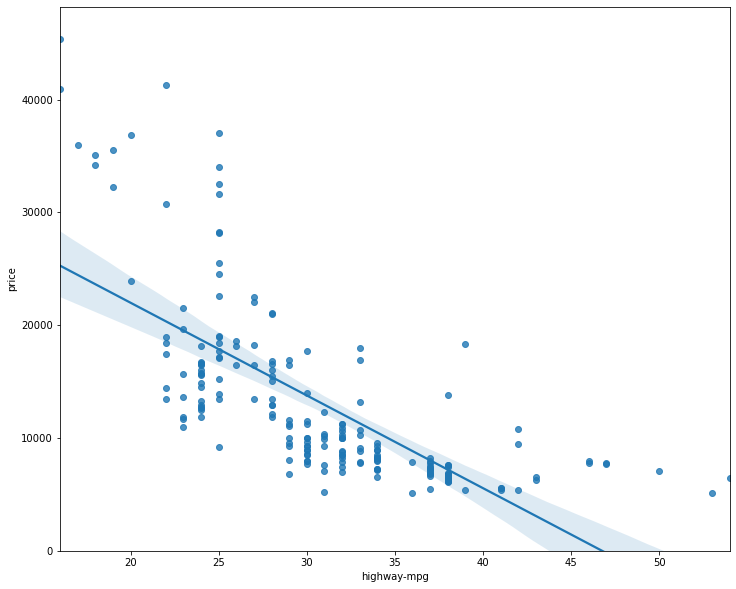

In [28]:
# Regression Plot
# Let's visualize 'highway-mpg' as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [29]:
# Let's compare this plot to the regression plot of "peak-rpm"

(0.0, 47414.1)

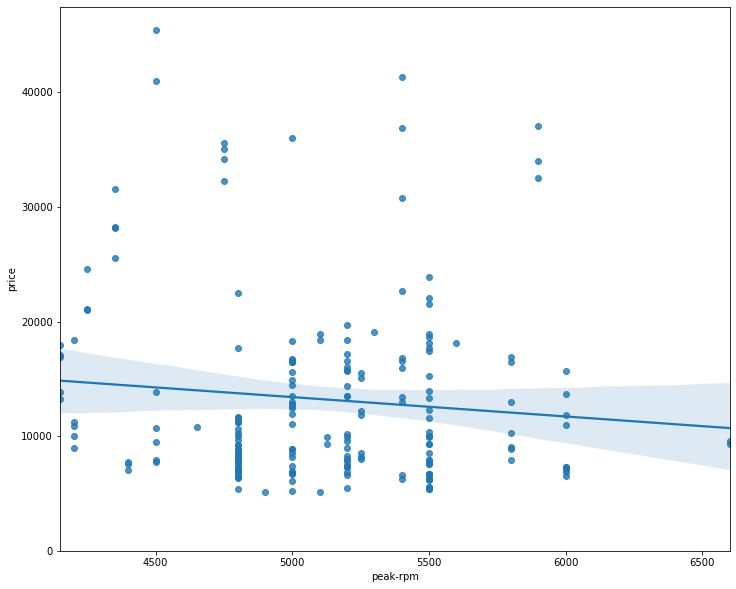

In [30]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [31]:
# QUESTION: Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.
# Answer: "highway-mpg" 
df[['peak-rpm', 'highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [32]:
# Residual Plot (to visualize the variance of the data)
# A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

# We look at the spread of the residuals:

    # If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

    # This is because, Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.




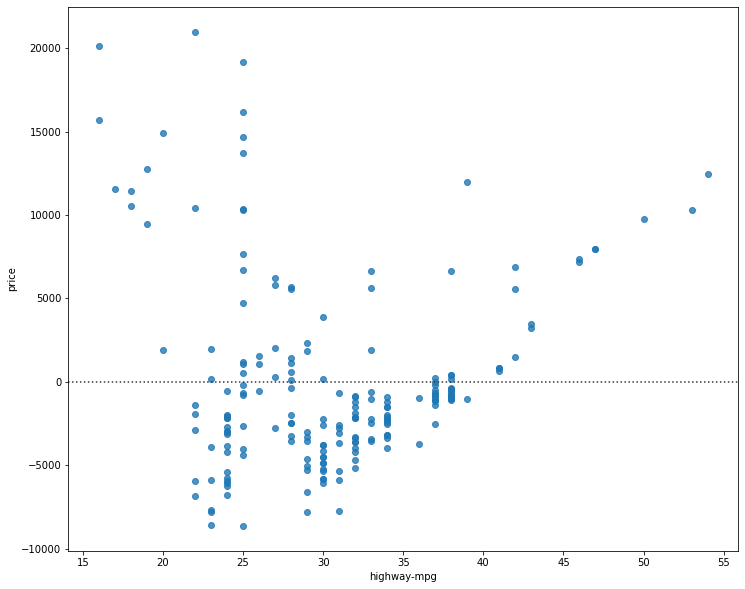

In [33]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [34]:
# Residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

In [35]:
# VISUALIZING MULTIPLE LINEAR REGRESSION

# One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.


In [36]:
Y_hat = lm.predict(Z)

C:\Users\joant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\joant\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


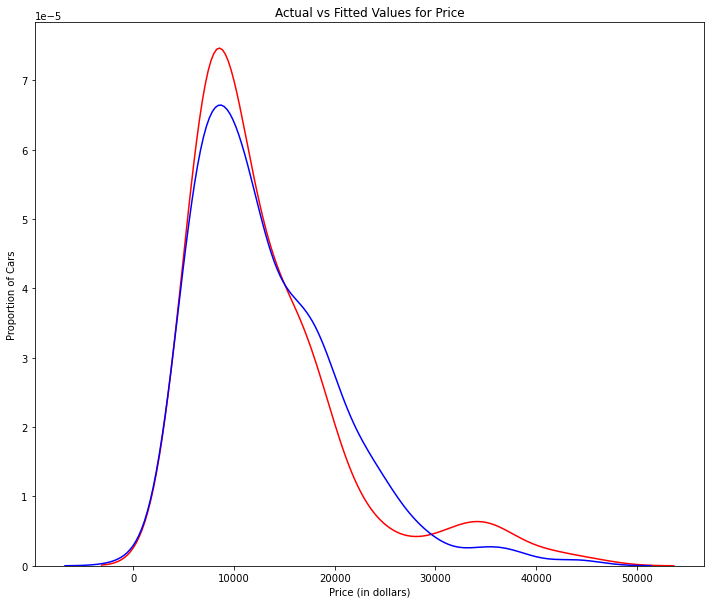

In [37]:
# Distribution Plot

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [38]:
# Fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.


In [39]:
# 3. POLYNOMIAL REGRESSION AND PIPELINES

In [40]:
# We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. 
# Let's see if we can try fitting a polynomial model to the data instead.

In [41]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [42]:
x = df['highway-mpg']
y = df['price']

In [43]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


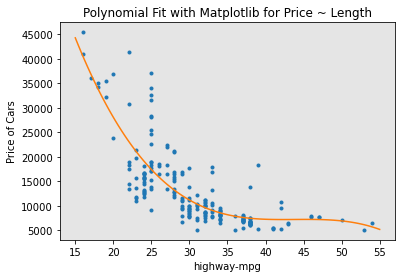

In [44]:
PlotPolly(p, x, y, 'highway-mpg')

In [45]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [46]:
# We can already see from plotting that this polynomial model performs better than the linear model. 

# This is because the generated polynomial function  "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


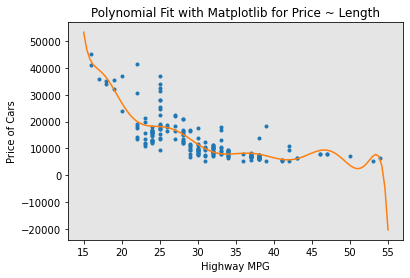

In [47]:
# QUESTION: Create 11 order polynomial model with the variables x and y from above.
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [48]:
# The analytical expression for Multivariate Polynomial function gets complicated. (Ex: Més d'una variable al quadrat)

# We can perform a polynomial transform on multiple features. First, we import the module:

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [51]:
Z_pr=pr.fit_transform(Z)

In [52]:
Z.shape

(201, 4)

In [53]:
Z_pr.shape

(201, 15)

In [54]:
# Pipeline
# Data Pipelines simplify the steps of processing the data.

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [57]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [58]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [59]:
# First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

# Then, we can normalize the data,  perform a transform and fit the model simultaneously. 

In [60]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [61]:
# Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [62]:
# QUESTION: Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.


In [63]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

In [64]:
# 4. MEASURES FOR IN-SAMPLE EVALUATION

In [65]:
# Two very important measures that are often used in Statistics to determine the accuracy of a model are:

    # R-squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
    
    # Mean Squared Error (MSE), measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ)
    

In [66]:
# Evaluation of first model: Simple Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)


# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [70]:
# Let's calculate the MSE.
# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [71]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [ ]:
# Evaluation of second model: Multiple Linear Regression

In [75]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

#Find the R-square
print('The R-square is: ', lm.score(Z, df['price']))


The R-square is:  0.8093562806577457


In [76]:
# Let's calculate the MSE.

In [77]:
Y_predict_multifit = lm.predict(Z)

In [78]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [79]:
# Evaluation of third model: Polynomial Fit

In [80]:
from sklearn.metrics import r2_score

In [82]:
# Find R-squared
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


In [83]:
# Calculate MSE
mean_squared_error(df['price'], p(x))

20474146.42636125

In [84]:
# 5. PREDICTION AND DECISION MAKING

In [85]:
# In the previous section, we trained the model using the method fit. 
# Now we will use the method predict to produce a prediction.

In [86]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [87]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [88]:
lm.fit(X, Y)
lm

LinearRegression()

In [89]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

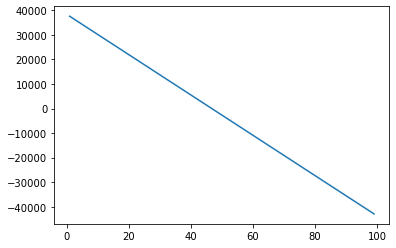

In [90]:
plt.plot(new_input, yhat)
plt.show()

In [ ]:
# DECISION MAKING: Determining a Good Model of